In [3]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


# **Load and Inspect Data**

In [5]:
# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

# Quick look at data
print(train.shape)
print(train.columns)
train.head()

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Understand the Data**

In [6]:
# Structure of dataset
train.info()

# Summary statistics
train.describe()

# Check for null values
train.isnull().sum()

# Value counts for categorical columns
print(train['Sex'].value_counts())
print(train['Pclass'].value_counts())
print(train['Embarked'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


# **Visual Exploration**

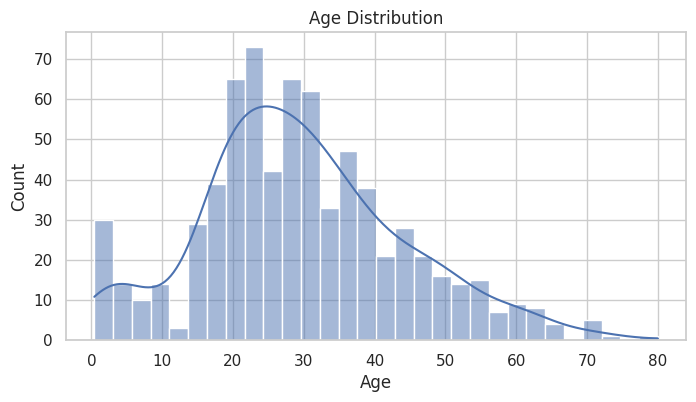

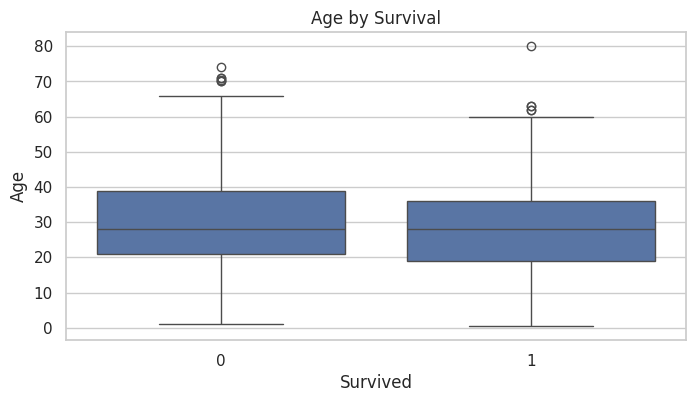

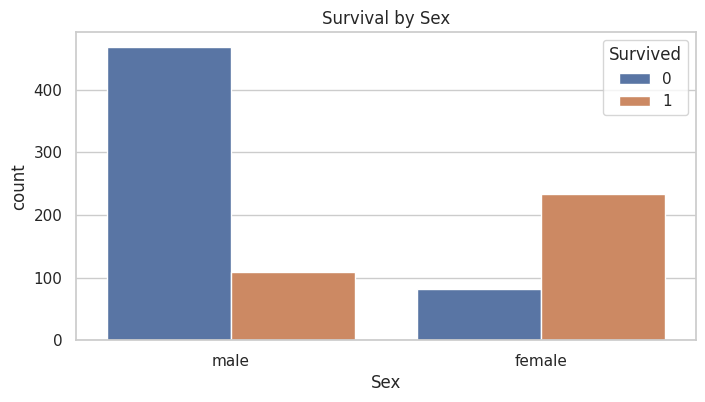

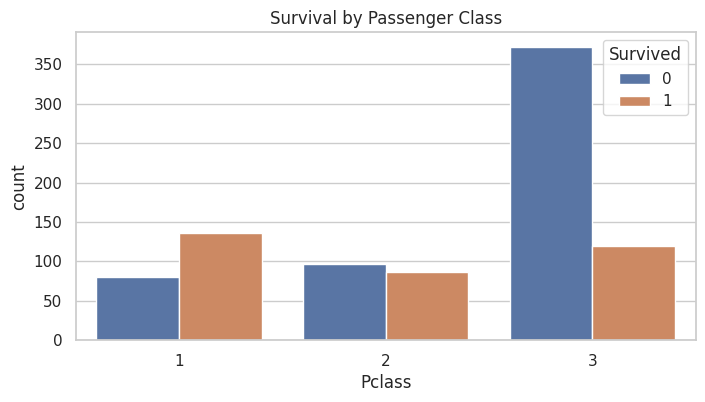

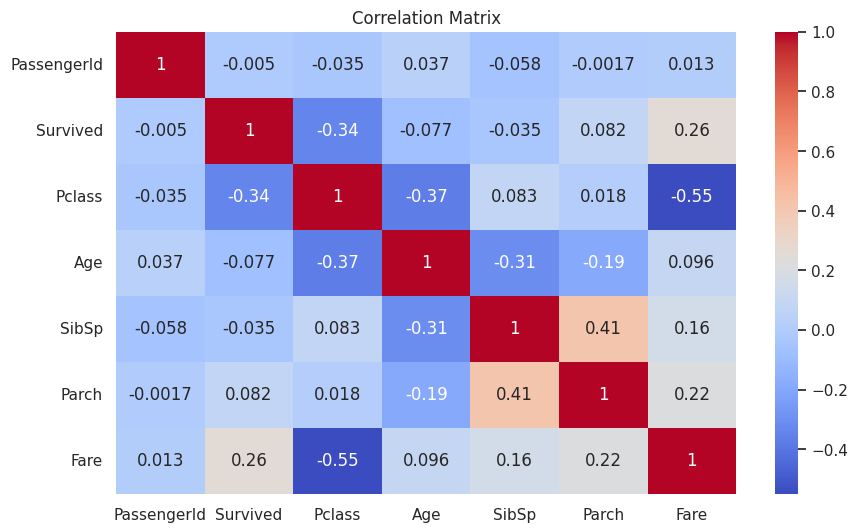

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram of Age
plt.figure(figsize=(8, 4))
sns.histplot(train['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age vs Survived
plt.figure(figsize=(8, 4))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age by Survival')
plt.show()

# Countplot of Sex vs Survived
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Sex')
plt.show()

# Countplot of Pclass vs Survived
plt.figure(figsize=(8, 4))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
numerical_features = train.select_dtypes(include=['number']) # Select only numerical columns for correlation
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Pairplot for Selected Features**

<ipython-input-9-f9579910c0a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Sex'] = selected_features['Sex'].map({'male': 0, 'female': 1})


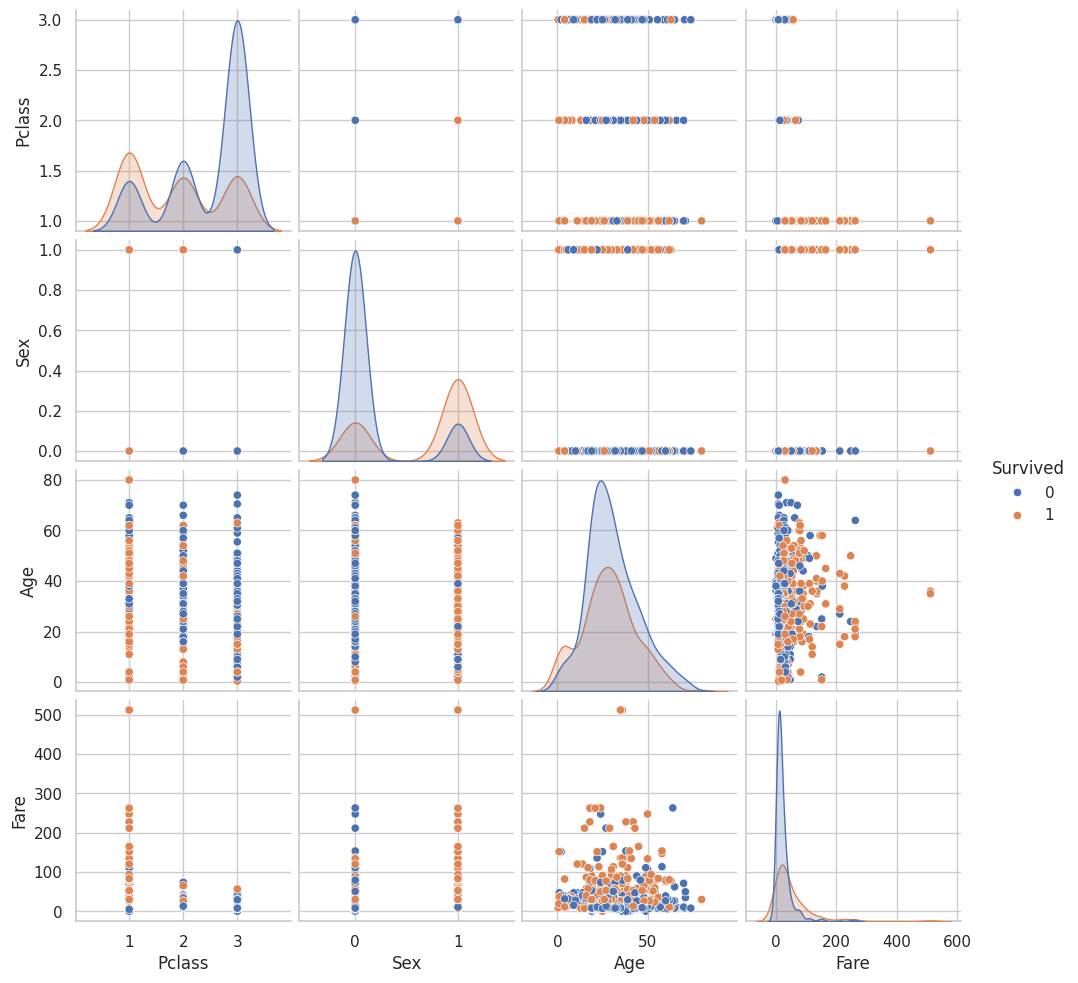

In [9]:
# Select important features
selected_features = train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
# Convert categorical to numeric
selected_features['Sex'] = selected_features['Sex'].map({'male': 0, 'female': 1})

# Drop NA
selected_features = selected_features.dropna()

# Pairplot
sns.pairplot(selected_features, hue='Survived')
plt.show()


# **Observations and Insights**

### Observation: Survival by Sex
From the countplot, it's clear that more females survived than males. This indicates that gender played a significant role in survival.

### Observation: Survival by Age
The boxplot shows younger passengers had a slightly higher chance of survival, with many children surviving.

### Observation: Survival by Passenger Class
Passengers in 1st class survived more than those in 2nd or 3rd class. Lower-class passengers had the lowest survival rate.

### Observation: Correlation Matrix
Fare and Pclass show some correlation with survival. Age has a slight negative correlation with survival.


# **Summary of Findings**

### Summary of Findings

- Female passengers had a much higher survival rate than males.
- Passengers in 1st class had the highest survival rates, indicating a socio-economic bias.
- Younger passengers (especially children) were more likely to survive.
- Fare amount shows a positive correlation with survival — those who paid more had better chances of survival (likely due to better cabins).
- Age had a slight negative correlation, suggesting older passengers were less likely to survive.
